# **Comparison of DIfferent classifiers for Rainfall prediction In Raipur City**

---




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

Dataset containing the 2 years Rainfall information of Raipur city  is taken

In [ ]:
df=pd.read_csv("edited weather.csv")

In [ ]:
df.head()

,name,datetime,tempmax,tempmin,temp,humidity,precip,sunrise,sunset,icon,raintoday,raintomorrow
0,"Raipur,India",01-05-2020,40.6,25.9,32.9,40.8,0.0,2020-05-01T05:32:39,2020-05-01T18:28:43,clear-day,no,no
1,"Raipur,India",02-05-2020,41.8,27.1,33.9,36.5,0.0,2020-05-02T05:32:01,2020-05-02T18:29:07,clear-day,no,no
2,"Raipur,India",03-05-2020,41.6,24.5,33.7,39.2,0.0,2020-05-03T05:31:25,2020-05-03T18:29:31,clear-day,no,no
3,"Raipur,India",04-05-2020,40.4,26.3,32.8,43.2,0.0,2020-05-04T05:30:49,2020-05-04T18:29:55,clear-day,no,yes
4,"Raipur,India",05-05-2020,41.3,25.7,32.8,42.0,0.4,2020-05-05T05:30:15,2020-05-05T18:30:19,rain,yes,yes


**NOTE:**the amount of precipitation is explained in mm

---



# DATA PREPROCESSING

For ,Dimensionality reduction the irrelevant attributes for rainfall prediction like sunrise and set times,icon and the city name is removed as we are concerned with only one city


In [ ]:
del df['name']
del df['sunrise']
del df['sunset']
del df['icon']
df


,datetime,tempmax,tempmin,temp,humidity,precip,raintoday,raintomorrow
0,01-05-2020,40.6,25.9,32.9,40.8,0.0,no,no
1,02-05-2020,41.8,27.1,33.9,36.5,0.0,no,no
2,03-05-2020,41.6,24.5,33.7,39.2,0.0,no,no
3,04-05-2020,40.4,26.3,32.8,43.2,0.0,no,yes
4,05-05-2020,41.3,25.7,32.8,42.0,0.4,yes,yes
...,...,...,...,...,...,...,...,...
817,27-07-2022,29.0,24.5,26.6,86.2,23.3,yes,yes
818,28-07-2022,29.7,25.0,27.2,84.2,11.0,yes,yes
819,29-07-2022,30.0,25.2,27.4,83.5,8.2,yes,yes
820,30-07-2022,29.7,25.1,27.4,82.8,26.9,yes,yes


In [ ]:
df1=df.head(10)
df1

,datetime,tempmax,tempmin,temp,humidity,precip,raintoday,raintomorrow
0,01-05-2020,40.6,25.9,32.9,40.8,0.0,no,no
1,02-05-2020,41.8,27.1,33.9,36.5,0.0,no,no
2,03-05-2020,41.6,24.5,33.7,39.2,0.0,no,no
3,04-05-2020,40.4,26.3,32.8,43.2,0.0,no,yes
4,05-05-2020,41.3,25.7,32.8,42.0,0.4,yes,yes
5,06-05-2020,39.1,22.2,31.2,51.2,15.0,yes,yes
6,07-05-2020,39.4,20.9,29.5,59.2,19.0,yes,yes
7,08-05-2020,38.0,20.7,29.0,65.2,25.0,yes,yes
8,09-05-2020,37.8,23.0,30.0,61.0,21.8,yes,no
9,10-05-2020,38.4,24.8,30.2,53.7,0.0,no,no


# Feature Creation

**Defining classes and thier labels--**

if precip is 0 - NO rainfall

if 0<precip<=2.5 - Light rainfall

if  2.5<precip<10 - Moderate rainfall

if  10<precip<50 - Heavy rainfall

if precip>50 - very heavy rainfall


In [ ]:
conditions=[ (df['precip']== 0), (df['precip']>0) & (df['precip']<=2.5) , (df['precip']>2.5) & (df['precip']<=10) , (df['precip']>10) & (df['precip']<=50) ,(df['precip']>50)]

In [ ]:
labels=['no', 'light', 'moderate','heavy','very heavy']

In [ ]:
df['type']=np.select(conditions,labels)

In [ ]:
df.head()

,datetime,tempmax,tempmin,temp,humidity,precip,raintoday,raintomorrow,type
0,01-05-2020,40.6,25.9,32.9,40.8,0.0,no,no,no
1,02-05-2020,41.8,27.1,33.9,36.5,0.0,no,no,no
2,03-05-2020,41.6,24.5,33.7,39.2,0.0,no,no,no
3,04-05-2020,40.4,26.3,32.8,43.2,0.0,no,yes,no
4,05-05-2020,41.3,25.7,32.8,42.0,0.4,yes,yes,light


# Correlation matrix for the data

<ipython-input-17-a18625a2ea05>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr(method = "spearman")


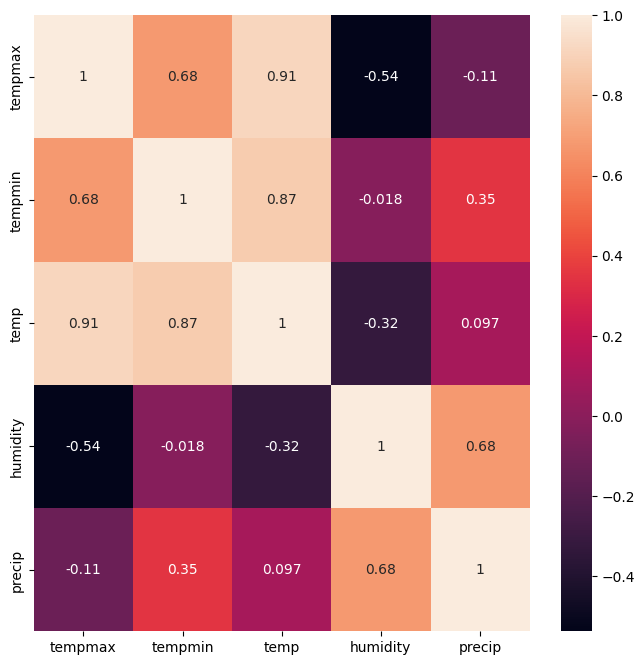

In [ ]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(8,8))
g=sns.heatmap(corrmat,annot=True)

AS data is alredy classified into classes and stored as another column..precip is being deleted.

In [ ]:
del df['precip']


In [ ]:
del df['raintomorrow']
df.head()

,datetime,tempmax,tempmin,temp,humidity,raintoday,type
0,01-05-2020,40.6,25.9,32.9,40.8,no,no
1,02-05-2020,41.8,27.1,33.9,36.5,no,no
2,03-05-2020,41.6,24.5,33.7,39.2,no,no
3,04-05-2020,40.4,26.3,32.8,43.2,no,no
4,05-05-2020,41.3,25.7,32.8,42.0,yes,light


Mapping the Categorial data of Raintype to numerical data type

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['type'])
le_name_map = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_map

{'heavy': 0, 'light': 1, 'moderate': 2, 'no': 3, 'very heavy': 4}

In [ ]:
df['type']=df['type'].map(le_name_map)
df.head()

,datetime,tempmax,tempmin,temp,humidity,raintoday,type
0,01-05-2020,40.6,25.9,32.9,40.8,no,3
1,02-05-2020,41.8,27.1,33.9,36.5,no,3
2,03-05-2020,41.6,24.5,33.7,39.2,no,3
3,04-05-2020,40.4,26.3,32.8,43.2,no,3
4,05-05-2020,41.3,25.7,32.8,42.0,yes,1


A histogram on the count of values in different classes

<Axes: xlabel='type', ylabel='count'>

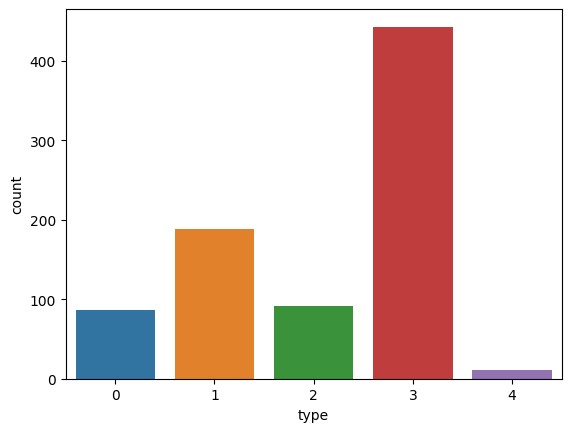

In [ ]:
sns.countplot(x=df['type'])

This clearly shows that this is a biased dataset which is biased towards type 3-Heavy rain

In [ ]:
df[["day", "month", "year"]] = df["datetime"].str.split("-", expand = True)
df

,datetime,tempmax,tempmin,temp,humidity,raintoday,type,day,month,year
0,01-05-2020,40.6,25.9,32.9,40.8,no,3,01,05,2020
1,02-05-2020,41.8,27.1,33.9,36.5,no,3,02,05,2020
2,03-05-2020,41.6,24.5,33.7,39.2,no,3,03,05,2020
3,04-05-2020,40.4,26.3,32.8,43.2,no,3,04,05,2020
4,05-05-2020,41.3,25.7,32.8,42.0,yes,1,05,05,2020
...,...,...,...,...,...,...,...,...,...,...
817,27-07-2022,29.0,24.5,26.6,86.2,yes,0,27,07,2022
818,28-07-2022,29.7,25.0,27.2,84.2,yes,0,28,07,2022
819,29-07-2022,30.0,25.2,27.4,83.5,yes,2,29,07,2022
820,30-07-2022,29.7,25.1,27.4,82.8,yes,0,30,07,2022


In [ ]:
del df['year']
df

,datetime,tempmax,tempmin,temp,humidity,raintoday,type,day,month
0,01-05-2020,40.6,25.9,32.9,40.8,no,3,01,05
1,02-05-2020,41.8,27.1,33.9,36.5,no,3,02,05
2,03-05-2020,41.6,24.5,33.7,39.2,no,3,03,05
3,04-05-2020,40.4,26.3,32.8,43.2,no,3,04,05
4,05-05-2020,41.3,25.7,32.8,42.0,yes,1,05,05
...,...,...,...,...,...,...,...,...,...
817,27-07-2022,29.0,24.5,26.6,86.2,yes,0,27,07
818,28-07-2022,29.7,25.0,27.2,84.2,yes,0,28,07
819,29-07-2022,30.0,25.2,27.4,83.5,yes,2,29,07
820,30-07-2022,29.7,25.1,27.4,82.8,yes,0,30,07


In [ ]:
df["raintoday"] = pd.get_dummies(df["raintoday"], drop_first = True)
df

,datetime,tempmax,tempmin,temp,humidity,raintoday,type,day,month
0,01-05-2020,40.6,25.9,32.9,40.8,0,3,01,05
1,02-05-2020,41.8,27.1,33.9,36.5,0,3,02,05
2,03-05-2020,41.6,24.5,33.7,39.2,0,3,03,05
3,04-05-2020,40.4,26.3,32.8,43.2,0,3,04,05
4,05-05-2020,41.3,25.7,32.8,42.0,1,1,05,05
...,...,...,...,...,...,...,...,...,...
817,27-07-2022,29.0,24.5,26.6,86.2,1,0,27,07
818,28-07-2022,29.7,25.0,27.2,84.2,1,0,28,07
819,29-07-2022,30.0,25.2,27.4,83.5,1,2,29,07
820,30-07-2022,29.7,25.1,27.4,82.8,1,0,30,07


Dividing into Train and test dataset with a Test size of 0.2

In [ ]:
X = df.drop(["type","datetime"], axis=1)
Y = df["type"]

In [ ]:
# scaler = RobustScaler()
# X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)
y_train

537    3
182    3
232    3
393    3
565    3
      ..
420    1
318    3
673    3
120    1
754    3
Name: type, Length: 657, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

Biasing is removed from the dataset by duplicating the values

In [ ]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({3: 354, 1: 151, 2: 73, 0: 70, 4: 9})
The number of classes after fit Counter({3: 354, 0: 354, 1: 354, 2: 354, 4: 354})


Using Catboost classifier for Classification

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


# Training

In [ ]:
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.045352
0:	total: 59ms	remaining: 1m 57s
1:	total: 67ms	remaining: 1m 6s
2:	total: 76.3ms	remaining: 50.8s
3:	total: 84.1ms	remaining: 42s
4:	total: 91.8ms	remaining: 36.6s
5:	total: 96.6ms	remaining: 32.1s
6:	total: 104ms	remaining: 29.7s
7:	total: 112ms	remaining: 28s
8:	total: 120ms	remaining: 26.6s
9:	total: 128ms	remaining: 25.5s
10:	total: 136ms	remaining: 24.6s
11:	total: 144ms	remaining: 23.9s
12:	total: 152ms	remaining: 23.2s
13:	total: 159ms	remaining: 22.6s
14:	total: 164ms	remaining: 21.7s
15:	total: 172ms	remaining: 21.3s
16:	total: 179ms	remaining: 20.9s
17:	total: 186ms	remaining: 20.5s
18:	total: 194ms	remaining: 20.3s
19:	total: 207ms	remaining: 20.5s
20:	total: 214ms	remaining: 20.2s
21:	total: 221ms	remaining: 19.9s
22:	total: 228ms	remaining: 19.6s
23:	total: 235ms	remaining: 19.4s
24:	total: 243ms	remaining: 19.2s
25:	total: 250ms	remaining: 19s
26:	total: 258ms	remaining: 18.8s
27:	total: 265ms	remaining: 18.7s
28:	total: 272ms	remaining: 18.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Catboost clasifier

# Testing

In [ ]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[[ 7  3  5  0  2]
 [ 3 24 11  0  0]
 [ 7  9  3  0  0]
 [ 0  0  0 89  0]
 [ 1  0  1  0  0]]
0.7454545454545455

              precision    recall  f1-score   support

           0       0.39      0.41      0.40        17
           1       0.67      0.63      0.65        38
           2       0.15      0.16      0.15        19
           3       1.00      1.00      1.00        89
           4       0.00      0.00      0.00         2

    accuracy                           0.75       165
   macro avg       0.44      0.44      0.44       165
weighted avg       0.75      0.75      0.75       165



Accuracy- 0.75--average model

Random forest

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [ ]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[ 6  4  5  0  2]
 [ 5 21 12  0  0]
 [10  6  2  0  1]
 [ 0  1  0 88  0]
 [ 1  0  1  0  0]]
0.7090909090909091
              precision    recall  f1-score   support

           0       0.27      0.35      0.31        17
           1       0.66      0.55      0.60        38
           2       0.10      0.11      0.10        19
           3       1.00      0.99      0.99        89
           4       0.00      0.00      0.00         2

    accuracy                           0.71       165
   macro avg       0.41      0.40      0.40       165
weighted avg       0.73      0.71      0.72       165



In [ ]:
y_pred1

array([3, 3, 3, 2, 0, 3, 3, 3, 0, 3, 0, 1, 1, 1, 1, 3, 3, 4, 3, 3, 3, 1,
       3, 2, 0, 0, 1, 1, 2, 1, 3, 3, 3, 1, 2, 1, 0, 3, 0, 3, 4, 0, 0, 0,
       3, 3, 3, 3, 3, 1, 1, 1, 2, 0, 1, 1, 3, 2, 3, 2, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 2, 3, 0, 3, 3, 2, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 2, 0, 0, 3, 4, 3, 3, 2, 1, 3, 3, 3, 2, 1, 3, 2, 1, 3, 3, 2,
       3, 3, 1, 1, 3, 2, 1, 1, 3, 3, 1, 3, 0, 1, 1, 1, 3, 3, 2, 3, 1, 1,
       3, 0, 3, 3, 0, 1, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 0, 3, 3, 3, 3, 3, 3, 2])

In [ ]:
y=rf.predict([[29.7,25.5,27.4,83.7,1,31,7]])
y

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [ ]:
X_test

,tempmax,tempmin,temp,humidity,raintoday,day,month
640,29.1,13.7,20.7,46.3,0,31,01
278,30.9,11.9,21.3,37.2,0,03,02
314,35.1,21.5,28.7,44.1,0,11,03
462,32.1,23.9,27.6,84.4,1,06,08
447,30.7,24.3,27.0,89.8,1,22,07
...,...,...,...,...,...,...,...
638,25.1,10.1,18.0,49.3,0,29,01
567,31.1,19.1,25.4,70.2,0,19,11
441,34.3,24.9,29.9,73.6,0,16,07
457,29.1,23.9,25.8,88.1,0,01,08


naive bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[ 8  0  4  0  5]
 [19  1 13  0  5]
 [ 9  2  3  0  5]
 [ 0  0  0 89  0]
 [ 1  0  0  0  1]]
0.6181818181818182
              precision    recall  f1-score   support

           0       0.22      0.47      0.30        17
           1       0.33      0.03      0.05        38
           2       0.15      0.16      0.15        19
           3       1.00      1.00      1.00        89
           4       0.06      0.50      0.11         2

    accuracy                           0.62       165
   macro avg       0.35      0.43      0.32       165
weighted avg       0.66      0.62      0.60       165



KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)
KNeighborsClassifier(n_neighbors=3)
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[ 2  3  6  2  4]
 [ 9 14 11  2  2]
 [ 6  4  3  2  4]
 [ 1 19  2 67  0]
 [ 1  0  1  0  0]]
0.5212121212121212
              precision    recall  f1-score   support

           0       0.11      0.12      0.11        17
           1       0.35      0.37      0.36        38
           2       0.13      0.16      0.14        19
           3       0.92      0.75      0.83        89
           4       0.00      0.00      0.00         2

    accuracy                           0.52       165
   macro avg       0.30      0.28      0.29       165
weighted avg       0.60      0.52      0.56       165

